In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier;

In [69]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import pylab as plt
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv('../../data/telecom_churn.csv')

In [4]:
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
data.drop(['State', 'Voice mail plan'], axis=1, inplace=True)

In [6]:
data['International plan'] = data['International plan'].map({'Yes': 1,
                                                             'No': 0})

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null int64
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64
Churn                     3333 non-null bool
dtypes: bool(1), float64(8), int64(9)
memory usage

In [9]:
y = data['Churn'].astype('int')

In [10]:
X = data.drop('Churn', axis=1)

In [11]:
X.shape, y.shape

((3333, 17), (3333,))

In [13]:
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

In [14]:

X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
                                                      test_size=0.3,
                                                      random_state=17)

In [12]:
X_train.shape, X_valid.shape

((2333, 17), (1000, 17))

In [15]:
y_train.shape, y_valid.shape

((2333,), (1000,))

In [16]:
first_tree = DecisionTreeClassifier(random_state=17)

In [18]:
np.mean(cross_val_score(first_tree, X_train, y_train, cv=5))

0.9138423504976518

In [19]:
cross_val_score(first_tree, X_train, y_train, cv=5)

array([0.9143469 , 0.91220557, 0.92077088, 0.90772532, 0.91416309])

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
first_knn = KNeighborsClassifier()

In [28]:
np.mean(cross_val_score(first_knn, X_train, y_train, cv=5))

0.8671274043984523

## настраиваем max_depth для дерева

In [29]:
from sklearn.model_selection import GridSearchCV

In [33]:
GridSearchCV?

In [30]:
tree_params = {'max_depth': np.arange(1, 11), 'max_features':[.5, .7, 1]}

In [34]:
tree_grid = GridSearchCV(first_tree, tree_params, cv=5, n_jobs=-1, verbose=1)

In [35]:
%%time
tree_grid.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Wall time: 359 ms


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=17,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'max_features': [0.5, 0.7, 1

In [22]:
tree_grid.best_score_, tree_grid.best_params_

(0.9391341620231461, {'max_depth': 6, 'max_features': 0.7})

In [38]:
tree_grid.best_params_

{'max_depth': 6, 'max_features': 0.7}

In [51]:
knn_params = {'n_neighbors': range(5, 30, 1) }#+ list(range(50, 100, 10))}

In [52]:
knn_grid = GridSearchCV(first_knn, knn_params, cv=5)

In [53]:
%%time
knn_grid.fit(X_train, y_train);

Wall time: 3.77 s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None, param_grid={'n_neighbors': range(5, 30)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [54]:
knn_grid.best_score_, knn_grid.best_params_

(0.8731247321045864, {'n_neighbors': 9})

In [56]:
tree_valid_pred = tree_grid.predict(X_valid)

In [57]:
from sklearn.metrics import accuracy_score

In [58]:
accuracy_score(y_valid, tree_valid_pred)

0.936

In [59]:
from sklearn.metrics import confusion_matrix

In [60]:
confusion_matrix(y_valid, tree_valid_pred)

array([[858,   9],
       [ 55,  78]], dtype=int64)

In [61]:
np.bincount(y_valid)

array([867, 133], dtype=int64)

In [62]:
from sklearn.tree import export_graphviz

In [86]:
second_tree = DecisionTreeClassifier(max_depth=6).fit(X_train, y_train)
second_tree.score(X_valid, y_valid)

0.946

In [64]:
#
export_graphviz(second_tree, out_file='telecom_tree2.dot',
               feature_names=X.columns, filled=True,)

In [65]:
#
!ls -l *.png

"ls" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [66]:
#
!dot -Tpng telecom_tree2.dot -o telecom_tree2.png

"dot" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [87]:
X.columns

Index(['Account length', 'Area code', 'International plan',
       'Number vmail messages', 'Total day minutes', 'Total day calls',
       'Total day charge', 'Total eve minutes', 'Total eve calls',
       'Total eve charge', 'Total night minutes', 'Total night calls',
       'Total night charge', 'Total intl minutes', 'Total intl calls',
       'Total intl charge', 'Customer service calls'],
      dtype='object')

<img src='telecom_tree2.png'>

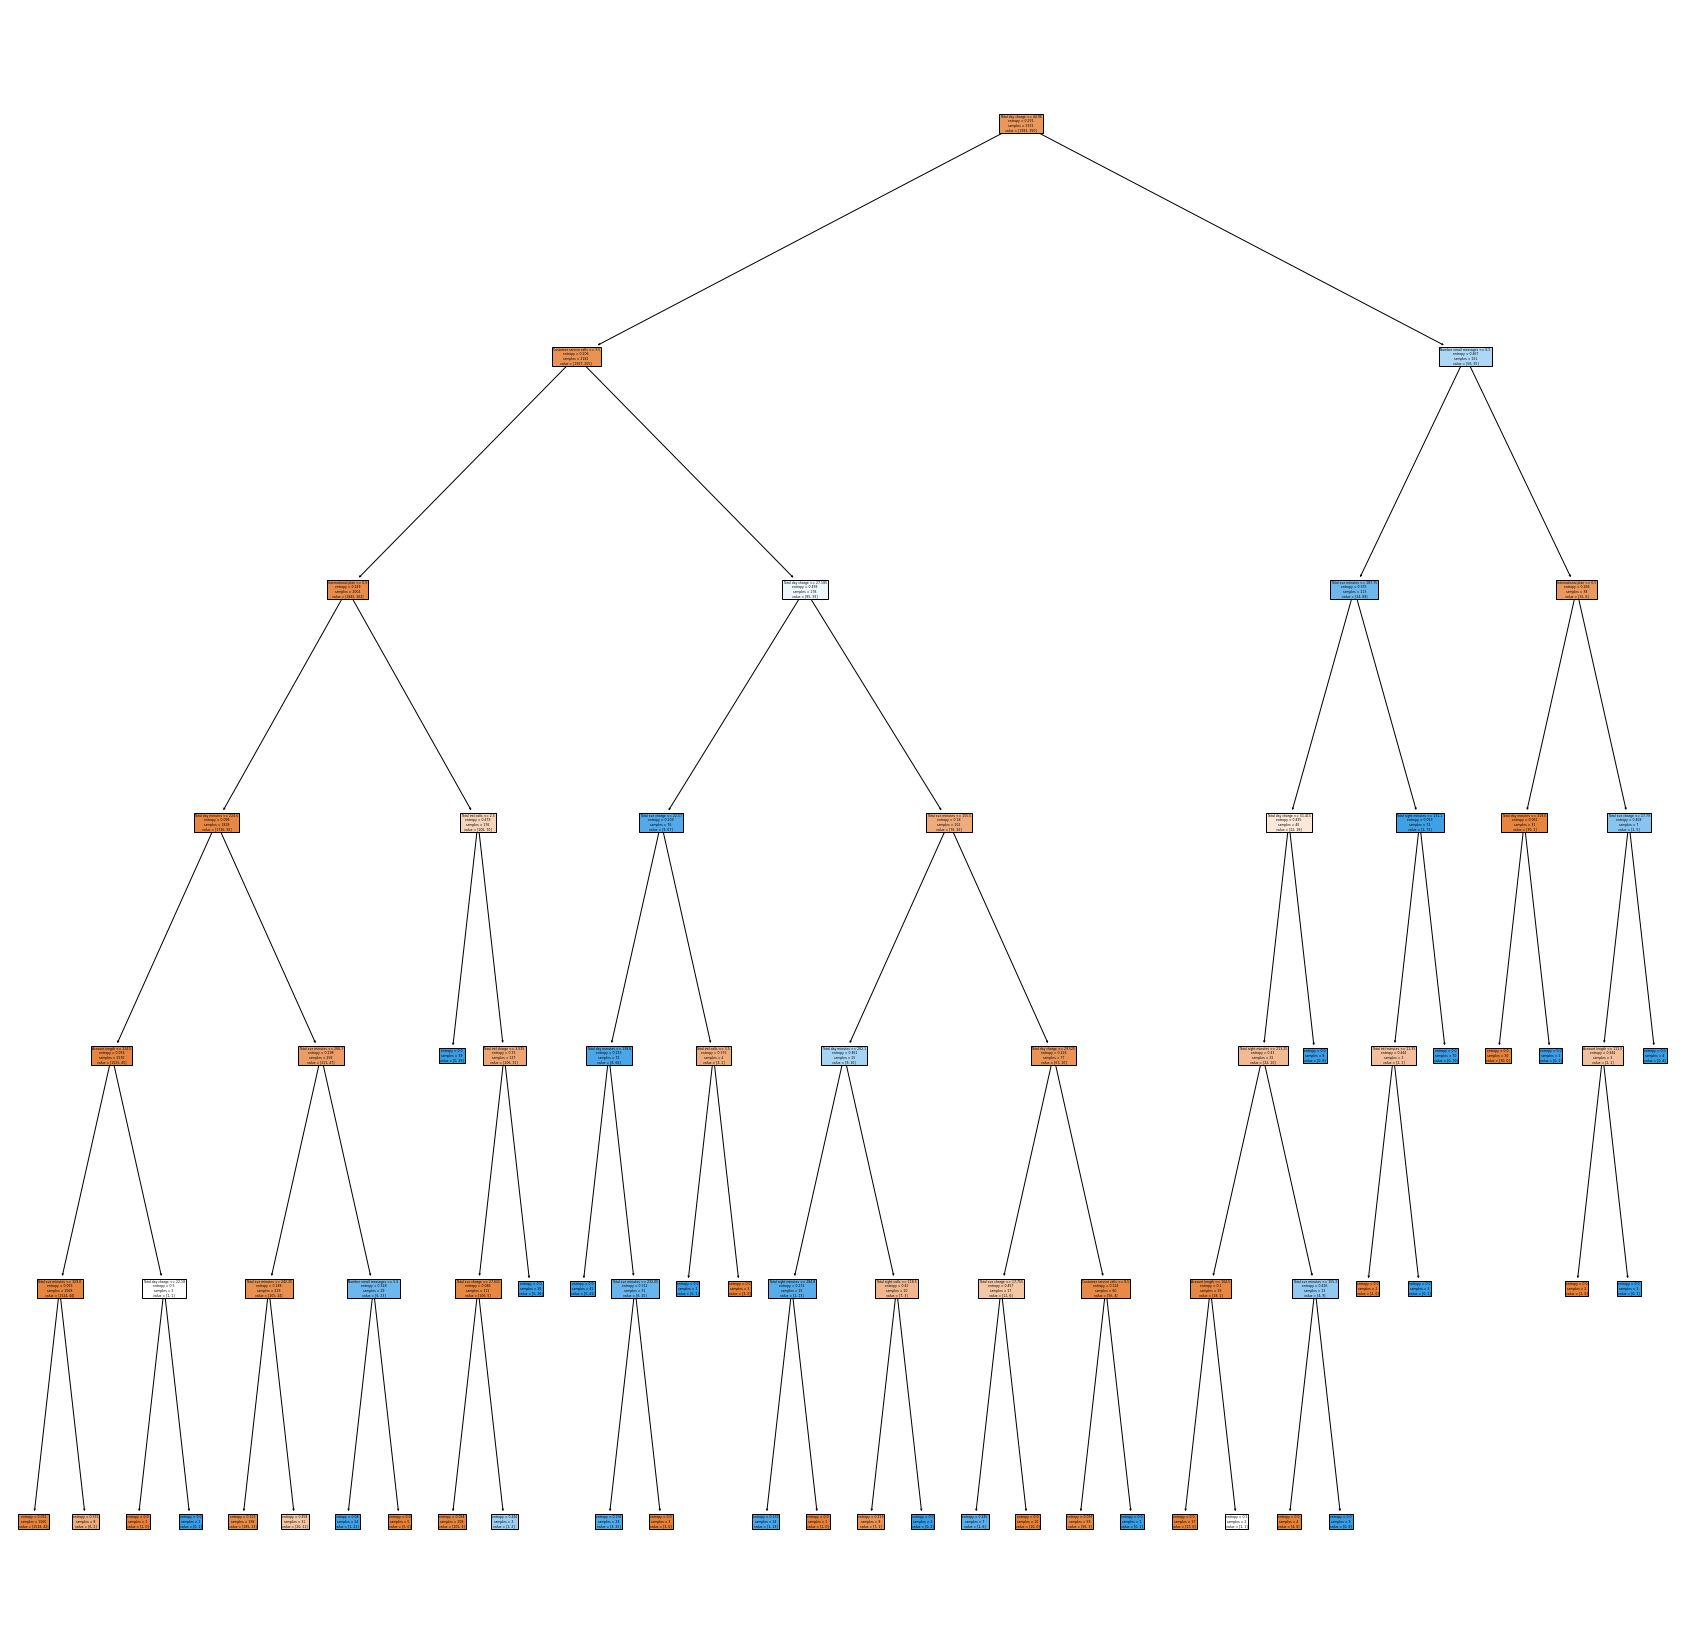

In [88]:
from sklearn.tree import plot_tree
plt.rcParams['figure.figsize'] = (30,30)
plot_tree(second_tree, filled=True,feature_names=X.columns);